In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

# Normalize data (scale pixels between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to include a single color channel
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("✅ Data normalized and reshaped successfully!")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (60000, 28, 28)
Testing samples: (10000, 28, 28)
✅ Data normalized and reshaped successfully!


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.8815 - loss: 0.3955 - val_accuracy: 0.9857 - val_loss: 0.0476
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9834 - loss: 0.0527 - val_accuracy: 0.9862 - val_loss: 0.0433
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9882 - loss: 0.0347 - val_accuracy: 0.9907 - val_loss: 0.0334
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9924 - loss: 0.0222 - val_accuracy: 0.9915 - val_loss: 0.0324
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9905 - val_loss: 0.0365


In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9884 - loss: 0.0361
✅ Test Accuracy: 99.08%


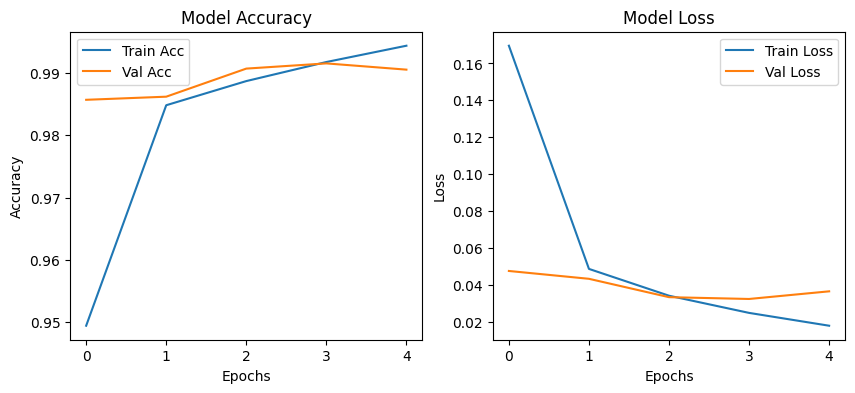

In [8]:
plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


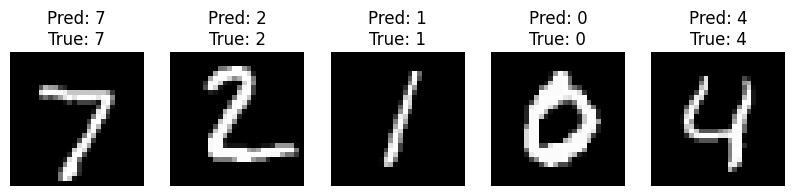

In [9]:
# Predict first 5 images from test set
predictions = model.predict(X_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:5], axis=1)

plt.figure(figsize=(10,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {true_classes[i]}")
    plt.axis('off')

plt.show()


In [10]:
model.save("mnist_digit_classifier.h5")
print("💾 Model saved as mnist_digit_classifier.h5")


💾 Model saved as mnist_digit_classifier.h5
